In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
file_path1 = "/content/drive/MyDrive/Colab Notebooks/MGT554/project/bike_demand_with_weather.csv"
df = pd.read_csv(file_path1)
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277836 entries, 0 to 277835
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   start_station_name      277836 non-null  object 
 1   year                    277836 non-null  int64  
 2   month                   277836 non-null  int64  
 3   day                     277836 non-null  int64  
 4   hour_period             277836 non-null  object 
 5   ride_count              277836 non-null  int64  
 6   date                    277836 non-null  object 
 7   precipitation_mm        277836 non-null  float64
 8   temperature_c           277836 non-null  float64
 9   relative_humidity_pct   277836 non-null  float64
 10  wind_speed_10m_m_s      277836 non-null  float64
 11  cloud_cover_pct         277836 non-null  float64
 12  apparent_temperature_c  277836 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 27.6+ MB


,start_station_name,year,month,day,hour_period,ride_count,date,precipitation_mm,temperature_c,relative_humidity_pct,wind_speed_10m_m_s,cloud_cover_pct,apparent_temperature_c
245313,Dixon Mills,2024,10,25,morning,10,2024-10-25,0.00,8.666667,69.166667,9.850000,0.000000,5.633333
85462,Manila & 1st,2022,7,22,morning,9,2022-07-22,0.00,26.800000,64.666667,6.883333,11.500000,29.416667
51898,Hoboken Terminal - Hudson St & Hudson Pl,2022,1,13,night,2,2022-01-13,0.00,-2.650000,83.166667,7.166667,95.333333,-6.483333
50682,Church Sq Park - 5 St & Park Ave,2022,1,23,afternoon,5,2022-01-23,0.51,0.650000,48.416667,9.833333,90.833333,-3.941667
83235,Dixon Mills,2022,7,20,afternoon,15,2022-07-20,0.00,30.641667,57.333333,14.341667,15.166667,33.566667


In [4]:
# define mapping from month to season code
month_to_season = {
    12: 4,  1: 4,  2: 4,   # Winter → 4
     3: 1,  4: 1,  5: 1,   # Spring → 1
     6: 2,  7: 2,  8: 2,   # Summer → 2
     9: 3, 10: 3, 11: 3    # Fall   → 3
}

# create the new column
df['Season'] = df['month'].map(month_to_season)

# check
df[['month', 'Season']].sample(10)

,month,Season
152831,7,2
53034,1,4
229454,7,2
49332,12,4
204068,3,1
77186,6,2
4546,3,1
108001,11,3
231835,8,2
218225,6,2


In [5]:
# create a subset for the specific station
station_name = 'Hoboken Terminal - River St & Hudson Pl'
df_station1 = df[df['start_station_name'] == station_name].copy()

# verify
df_station1[['start_station_name', 'ride_count']].head()

,start_station_name,ride_count
9846,Hoboken Terminal - River St & Hudson Pl,22
9847,Hoboken Terminal - River St & Hudson Pl,1
9848,Hoboken Terminal - River St & Hudson Pl,2
9849,Hoboken Terminal - River St & Hudson Pl,16
9850,Hoboken Terminal - River St & Hudson Pl,3


# Visualization

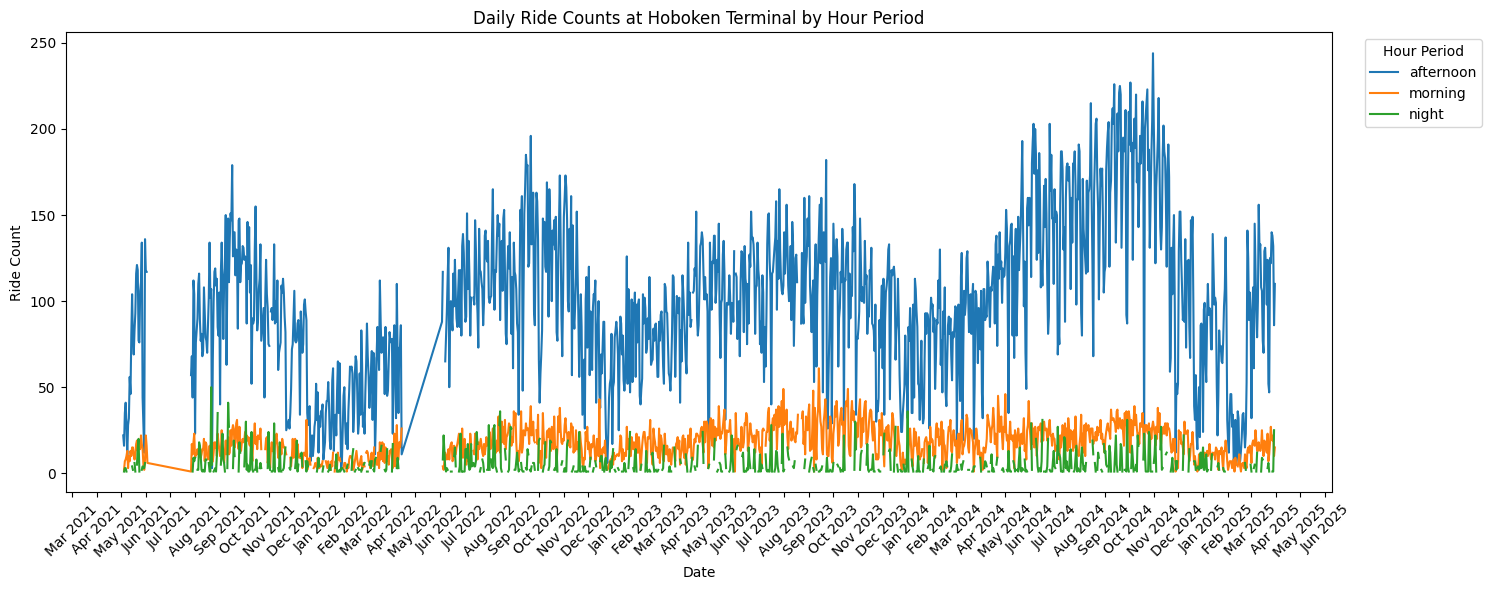

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ensure the 'date' column is datetime
df_station1['date'] = pd.to_datetime(df_station1['date'])

# aggregate to get total rides per day per hour_period
daily = (
    df_station1
    .groupby(['date', 'hour_period'], as_index=False)
    ['ride_count']
    .sum()
)

# pivot so each hour_period is its own column
pivot = daily.pivot(index='date', columns='hour_period', values='ride_count')

# plot
fig, ax = plt.subplots(figsize=(15, 6))
for period in pivot.columns:
    ax.plot(pivot.index, pivot[period], label=period)

# formatting
ax.set_title('Daily Ride Counts at Hoboken Terminal by Hour Period')
ax.set_xlabel('Date')
ax.set_ylabel('Ride Count')
ax.legend(title='Hour Period', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Comparison of 2 highest traffic stations

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
df_station2 = df[df['start_station_name'] == 'Newport PATH']

# Combine station 1 and station 2 dataframes
combined12 = pd.concat([df_station1, df_station2], axis=0, ignore_index=True)

# Quick check
print(combined12.shape)


combined12_afternoon = combined12[combined12['hour_period'] == 'afternoon']

(7152, 14)


In [9]:
combined12_afternoon.sample(5)

,start_station_name,year,month,day,hour_period,ride_count,date,precipitation_mm,temperature_c,relative_humidity_pct,wind_speed_10m_m_s,cloud_cover_pct,apparent_temperature_c,Season
579,Hoboken Terminal - River St & Hudson Pl,2022,2,9,afternoon,62,2022-02-09,0.00,3.125000,66.916667,14.141667,1.333333,-1.375000,4
5176,Newport PATH,2023,1,27,afternoon,46,2023-01-27,0.00,3.391667,55.166667,13.316667,43.333333,-1.308333,4
3631,Newport PATH,2021,5,2,afternoon,44,2021-05-02,0.00,22.475000,51.583333,16.933333,77.500000,20.808333,1
4369,Newport PATH,2022,2,19,afternoon,14,2022-02-19,0.68,0.325000,41.583333,30.041667,48.916667,-7.325000,4
3457,Newport PATH,2021,2,16,afternoon,8,2021-02-16,0.00,5.041667,71.083333,18.091667,19.833333,0.450000,4


In [10]:
print("Date range after parse:",
      combined12_afternoon['date'].min(),
      "to",
      combined12_afternoon['date'].max()
)

Date range after parse: 2021-02-03 00:00:00 to 2025-03-31 00:00:00


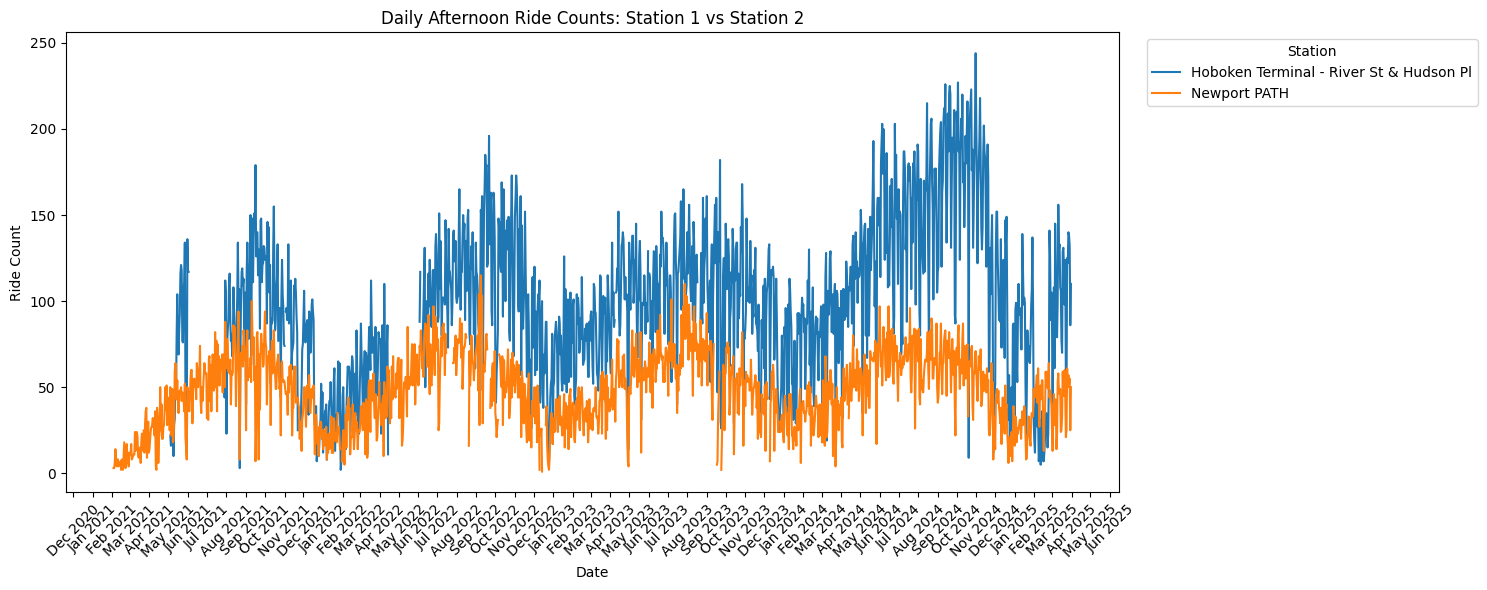

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# aggregate daily ride counts by station
daily_comp = (
    combined12_afternoon
    .groupby(['date', 'start_station_name'], as_index=False)['ride_count']
    .sum()
)

# pivot so each station is its own column
pivot_comp = daily_comp.pivot(
    index='date',
    columns='start_station_name',
    values='ride_count'
)

# plot
fig, ax = plt.subplots(figsize=(15, 6))
for station in pivot_comp.columns:
    ax.plot(pivot_comp.index, pivot_comp[station], label=station)

# formatting
ax.set_title('Daily Afternoon Ride Counts: Station 1 vs Station 2')
ax.set_xlabel('Date')
ax.set_ylabel('Ride Count')
ax.legend(title='Station', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Seasonal Impact

In [12]:
# prompt: turn df_station1['Season'] into categorical

df_station1['Season'] = df_station1['Season'].astype('category')


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Filter for Station 1 afternoons & parse date
df_s1_aft = df_station1[df_station1['hour_period'] == 'afternoon'].copy()
df_s1_aft['date'] = pd.to_datetime(df_s1_aft['date'], errors='coerce')

In [14]:
# ensure 'date' is datetime
df_s1_aft['date'] = pd.to_datetime(df_s1_aft['date'], errors='coerce')

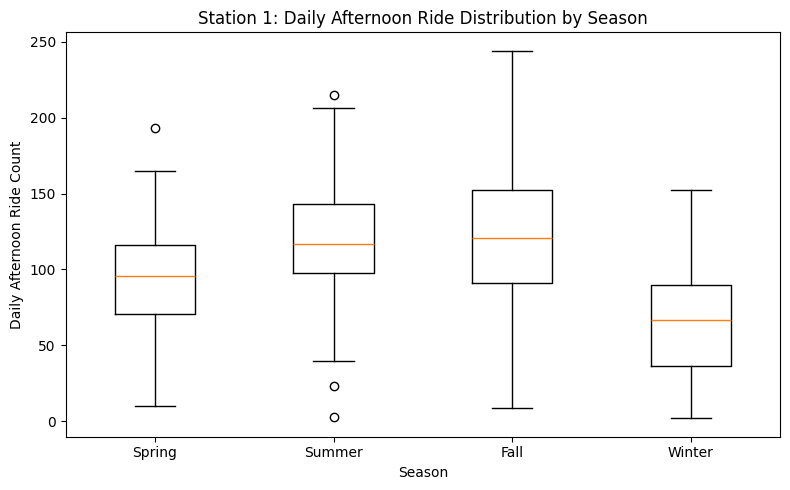

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Make sure 'date' is datetime
df_s1_aft['date'] = pd.to_datetime(df_s1_aft['date'], errors='coerce')

# 2) Group only the actually observed date–Season combos
daily_s1 = (
    df_s1_aft
      .dropna(subset=['date'])
      .groupby(
         ['date', 'Season'],
         as_index=False,
         observed=True            # <-- only keep observed categories
      )['ride_count']
      .sum()
)

# 3) Turn Season into an ordered categorical
daily_s1['Season'] = pd.Categorical(
    daily_s1['Season'],
    categories=[1, 2, 3, 4],    # 1=Spring,2=Summer,3=Fall,4=Winter
    ordered=True
)

# 4) Build the list of Series for each season
data = [
    daily_s1.loc[daily_s1['Season'] == s, 'ride_count']
    for s in daily_s1['Season'].cat.categories
]

# 5) Plot with tick_labels (new name for labels in matplotlib ≥3.9)
plt.figure(figsize=(8, 5))
plt.boxplot(
    data,
    tick_labels=['Spring', 'Summer', 'Fall', 'Winter']
)
plt.xlabel('Season')
plt.ylabel('Daily Afternoon Ride Count')
plt.title('Station 1: Daily Afternoon Ride Distribution by Season')
plt.tight_layout()
plt.show()

# Feature Engineering

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

*Lagged Values*

<Figure size 1200x600 with 0 Axes>

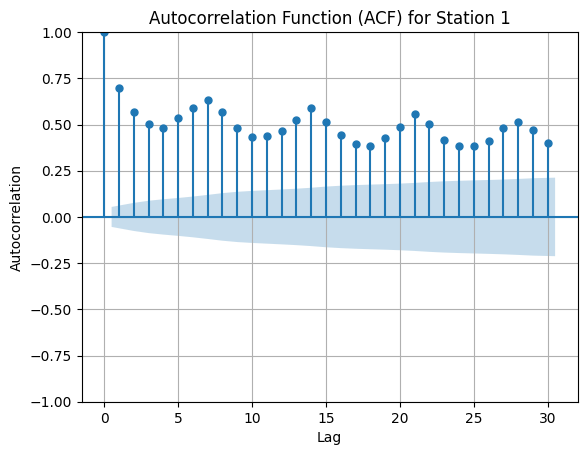

In [17]:
# Create a lag plot with 30 lags to check autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(df_s1_aft['ride_count'], lags=30)
plt.title('Autocorrelation Function (ACF) for Station 1')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [18]:
# prompt: drop the column start_station_name column from df_s1_aft

df_s1_aft = df_s1_aft.drop('start_station_name', axis=1)

In [19]:
# first ensure your dataframe is sorted by date
df_s1_aft = df_s1_aft.sort_values('date').reset_index(drop=True)

# add 7-day and 14-day lag features
df_s1_aft['lag_7']  = df_s1_aft['ride_count'].shift(7)
df_s1_aft['lag_14'] = df_s1_aft['ride_count'].shift(14)

# inspect
df_s1_aft[['date', 'ride_count', 'lag_7', 'lag_14']].head(20)

,date,ride_count,lag_7,lag_14
0,2021-05-04,22,NaN,NaN
1,2021-05-05,16,NaN,NaN
2,2021-05-06,35,NaN,NaN
3,2021-05-07,41,NaN,NaN
4,2021-05-08,28,NaN,NaN
5,2021-05-09,10,NaN,NaN
6,2021-05-10,28,NaN,NaN
7,2021-05-11,32,22.0,NaN
8,2021-05-12,56,16.0,NaN
9,2021-05-13,46,35.0,NaN


In [20]:
# prompt: drop missing values from df_s1_aft

df_s1_aft = df_s1_aft.dropna()

In [21]:
# prompt: print the new data range in df_s1_aft

print("New data range in df_s1_aft:", df_s1_aft['date'].min(), "to", df_s1_aft['date'].max())


New data range in df_s1_aft: 2021-05-18 00:00:00 to 2025-03-31 00:00:00


*Rolling Statistics*

In [22]:
# rolling windows to compute
mean_windows = [7, 14, 30]
std_windows  = [7, 14]

# 1) Rolling means
for w in mean_windows:
    df_s1_aft[f'roll_mean_{w}'] = df_s1_aft['ride_count'].rolling(window=w).mean()

# 2) Rolling standard deviations
for w in std_windows:
    df_s1_aft[f'roll_std_{w}'] = df_s1_aft['ride_count'].rolling(window=w).std()

# inspect the new features
df_s1_aft[['date', 'ride_count',
           'roll_mean_7', 'roll_mean_14', 'roll_mean_30',
           'roll_std_7', 'roll_std_14']].head(15)

<ipython-input-22-b03665ede960>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1_aft[f'roll_mean_{w}'] = df_s1_aft['ride_count'].rolling(window=w).mean()
<ipython-input-22-b03665ede960>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1_aft[f'roll_mean_{w}'] = df_s1_aft['ride_count'].rolling(window=w).mean()
<ipython-input-22-b03665ede960>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,date,ride_count,roll_mean_7,roll_mean_14,roll_mean_30,roll_std_7,roll_std_14
14,2021-05-18,83,NaN,NaN,NaN,NaN,NaN
15,2021-05-19,93,NaN,NaN,NaN,NaN,NaN
16,2021-05-20,116,NaN,NaN,NaN,NaN,NaN
17,2021-05-21,121,NaN,NaN,NaN,NaN,NaN
18,2021-05-22,118,NaN,NaN,NaN,NaN,NaN
19,2021-05-23,77,NaN,NaN,NaN,NaN,NaN
20,2021-05-24,76,97.714286,NaN,NaN,20.113961,NaN
21,2021-05-25,106,101.000000,NaN,NaN,19.165942,NaN
22,2021-05-26,111,103.571429,NaN,NaN,19.121168,NaN
23,2021-05-27,134,106.142857,NaN,NaN,22.056205,NaN


In [23]:
# prompt: drop missing values from df_s1_aft

df_s1_aft = df_s1_aft.dropna()

In [24]:
# prompt: print the new data range in df_s1_aft

print("New data range in df_s1_aft:", df_s1_aft['date'].min(), "to", df_s1_aft['date'].max())


New data range in df_s1_aft: 2021-08-09 00:00:00 to 2025-03-31 00:00:00


# Modeling

*Data Preparation*

In [25]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform


In [26]:
# prompt: drop the column hour_period in df_s1_aft

df_s1_aft = df_s1_aft.drop('hour_period', axis=1)


In [27]:
df_s1_aft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1268 entries, 43 to 1310
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    1268 non-null   int64         
 1   month                   1268 non-null   int64         
 2   day                     1268 non-null   int64         
 3   ride_count              1268 non-null   int64         
 4   date                    1268 non-null   datetime64[ns]
 5   precipitation_mm        1268 non-null   float64       
 6   temperature_c           1268 non-null   float64       
 7   relative_humidity_pct   1268 non-null   float64       
 8   wind_speed_10m_m_s      1268 non-null   float64       
 9   cloud_cover_pct         1268 non-null   float64       
 10  apparent_temperature_c  1268 non-null   float64       
 11  Season                  1268 non-null   category      
 12  lag_7                   1268 non-null   float64     

In [28]:
# 2) Sort by date & drop initial NaNs from lag/rolling windows
df_s1_aft = df_s1_aft.sort_values('date').reset_index(drop=True)
df_model = df_s1_aft.dropna(subset=[
    'lag_7','lag_14',
    'roll_mean_7','roll_mean_14','roll_mean_30',
    'roll_std_7','roll_std_14'
])

In [29]:
# 3) Define features & target
feature_cols = [
    'year','month','day',
    'precipitation_mm','temperature_c','relative_humidity_pct',
    'wind_speed_10m_m_s','cloud_cover_pct','apparent_temperature_c',
    'Season','lag_7','lag_14',
    'roll_mean_7','roll_mean_14','roll_mean_30',
    'roll_std_7','roll_std_14'
]
X = df_model[feature_cols].copy()
y = df_model['ride_count']

# 4) Mark Season as categorical
X['Season'] = X['Season'].astype('category')

In [30]:
# 5) Time‐based train/test split (first 80% train, last 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [31]:
# 6) Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=['Season'])
lgb_eval  = lgb.Dataset(X_test,  label=y_test,  reference=lgb_train,
                       categorical_feature=['Season'])

*min-MAE Modeling*

In [32]:
# 1) Define the hyperparameter search space
mae_param_dist = {
    'num_leaves': randint(5, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 250)
}

# 2) Instantiate the regressor (optimizing MAE)
mae_model = lgb.LGBMRegressor(objective='mae', random_state=42)

# 3) Set up RandomizedSearchCV
mae_cv_search = RandomizedSearchCV(
    estimator=mae_model,
    param_distributions=mae_param_dist,
    n_iter=30,               # start small; increase once it runs
    cv=5,                   # 5-fold CV
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,              # parallelize across cores
    random_state=42
)

# 4) Fit on your training slice
mae_cv_search.fit(X_train, y_train)

# 5) Best estimator and hyperparameters
print("Best parameters:", mae_cv_search.best_params_)

# 6) Predict & evaluate on the hold-out test set
mae_y_pred = mae_cv_search.best_estimator_.predict(X_test)
mae_MAE_test = mean_absolute_error(y_test, mae_y_pred)
print(f"MAE for Test Set: {mae_MAE_test:.2f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 1014, number of used features: 17
[LightGBM] [Info] Start training from score 96.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

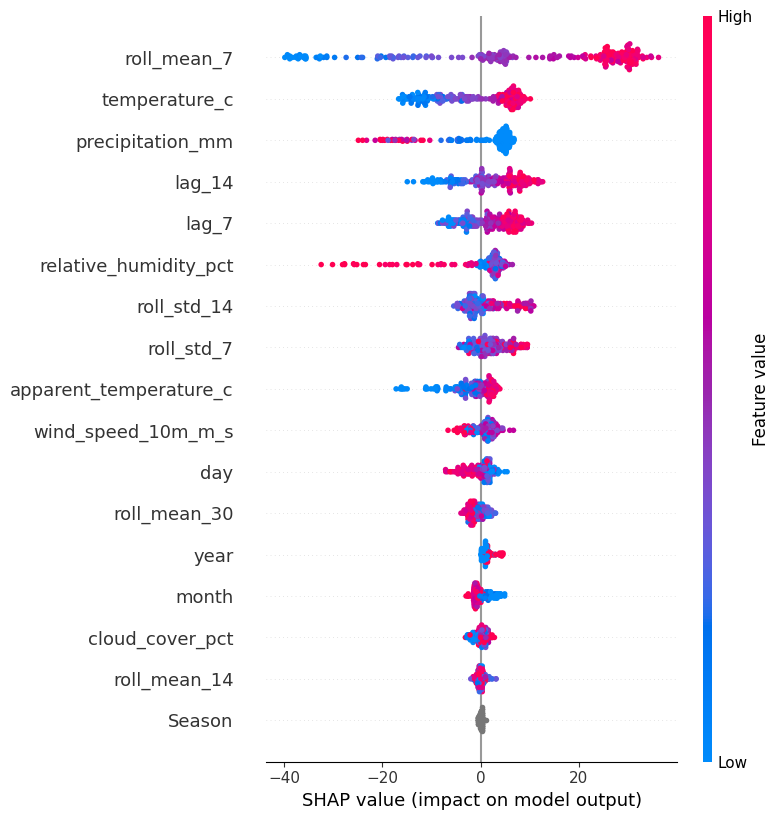

In [33]:
import shap

# 7) Calculate SHAP values
best_model = mae_cv_search.best_estimator_

# Use TreeExplainer for LightGBM models (fast and efficient)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# 8) Visualize SHAP values
# Summary plot - overall feature importance
shap.summary_plot(shap_values, X_test)

# (Optional) Force plot for individual prediction (e.g. first sample)
# This requires shap.initjs() if running in notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


*MAE Model Validation Visualization*

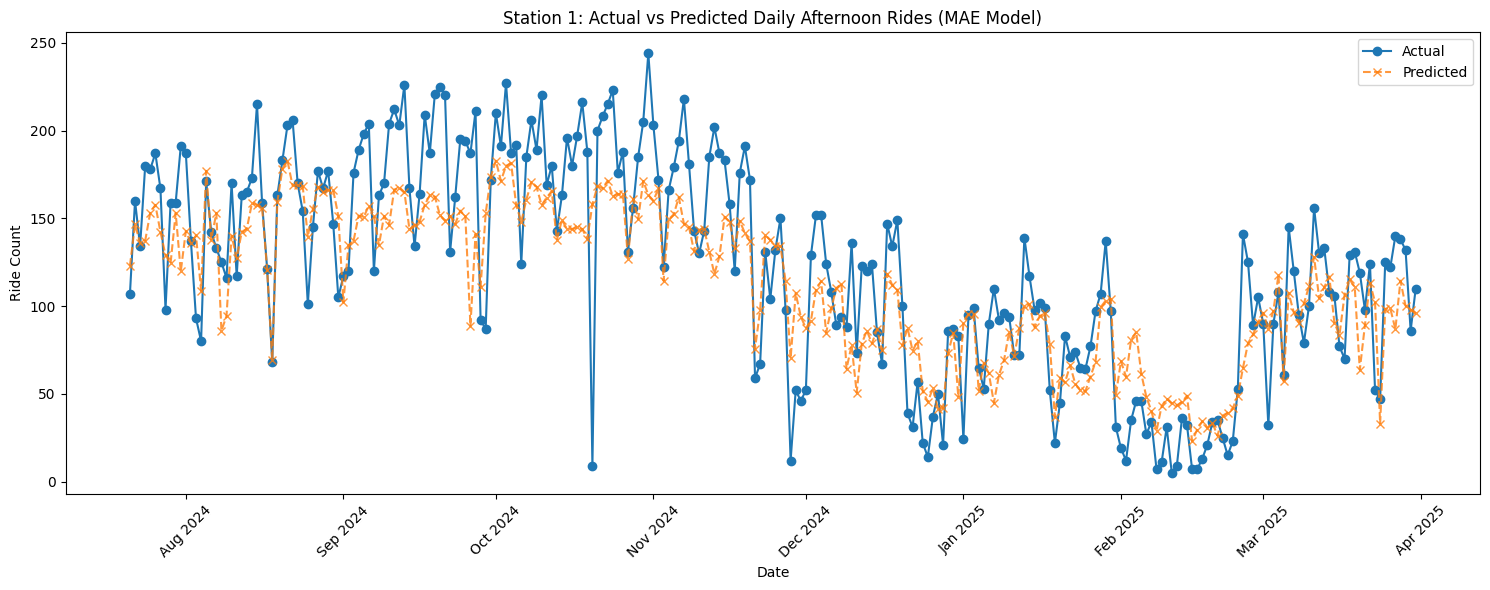

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# — get the test‐set dates
test_dates = df_model['date'].iloc[split_idx:]

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(test_dates, y_test.values, label='Actual', marker='o', linestyle='-')
ax.plot(test_dates, mae_y_pred,        label='Predicted', marker='x', linestyle='--', alpha=0.8)

# formatting
ax.set_title('Station 1: Actual vs Predicted Daily Afternoon Rides (MAE Model)')
ax.set_xlabel('Date')
ax.set_ylabel('Ride Count')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*min-Cost Modeling*

In [35]:
from sklearn.metrics import make_scorer

In [36]:
# 2) Define custom cost penalty
def penalty_cost(y_true, y_pred):
    diff  = y_pred - y_true
    over  = np.maximum(diff, 0)
    under = np.maximum(-diff, 0)
    cost  = 6.0 * under + 1.0 * over
    # return negative cost so that higher is “better” for RandomizedSearchCV
    return -np.mean(cost)

cost_scorer = make_scorer(penalty_cost, greater_is_better=True)

# 3) Instantiate LightGBM and set up hyperparameter grid
cost_model      = lgb.LGBMRegressor(random_state=42)
cost_param_dist = {
    'num_leaves': randint(5, 400),
    'max_depth': randint(3, 9),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(5, 300)
}

# 4) Run RandomizedSearchCV with our cost_scorer
cost_cv_search = RandomizedSearchCV(
    estimator=cost_model,
    param_distributions=cost_param_dist,
    n_iter=30,
    cv=5,
    scoring=cost_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
cost_cv_search.fit(X_train, y_train)

print("Best params (cost model):", cost_cv_search.best_params_)
print("Best validation score (neg cost):", cost_cv_search.best_score_)

# 5) Evaluate the best model on the validation set
cost_best_model = cost_cv_search.best_estimator_
cost_y_pred     = cost_best_model.predict(X_test)

# compute true average cost (positive)
cost_raw        = (
    6.0 * np.maximum(y_test - cost_y_pred, 0) +
    1.0 * np.maximum(cost_y_pred - y_test, 0)
)
cost_avg        = np.mean(cost_raw)
print("Avg cost on validation ($):", cost_avg)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 1014, number of used features: 17
[LightGBM] [Info] Start training from score 95.453649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

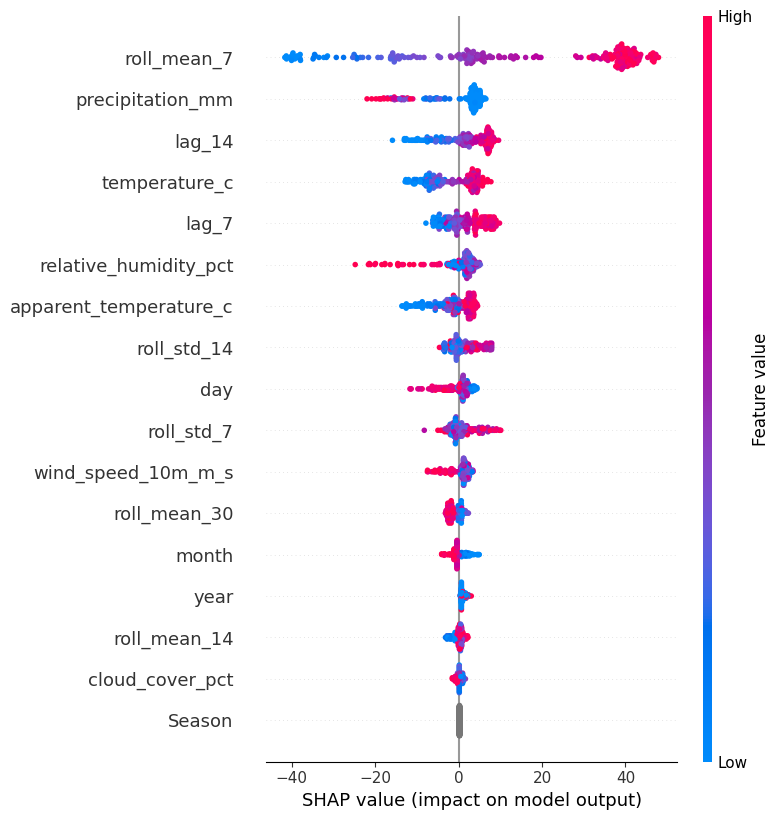

In [37]:
# 6) Calculate SHAP values
best_model = cost_cv_search.best_estimator_

# Use TreeExplainer for LightGBM models
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# 7) Visualize SHAP values
# Summary plot to show global feature importance
shap.summary_plot(shap_values, X_test)

# (Optional) Force plot for an individual prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


*Min Cost Model Validation Visualization*

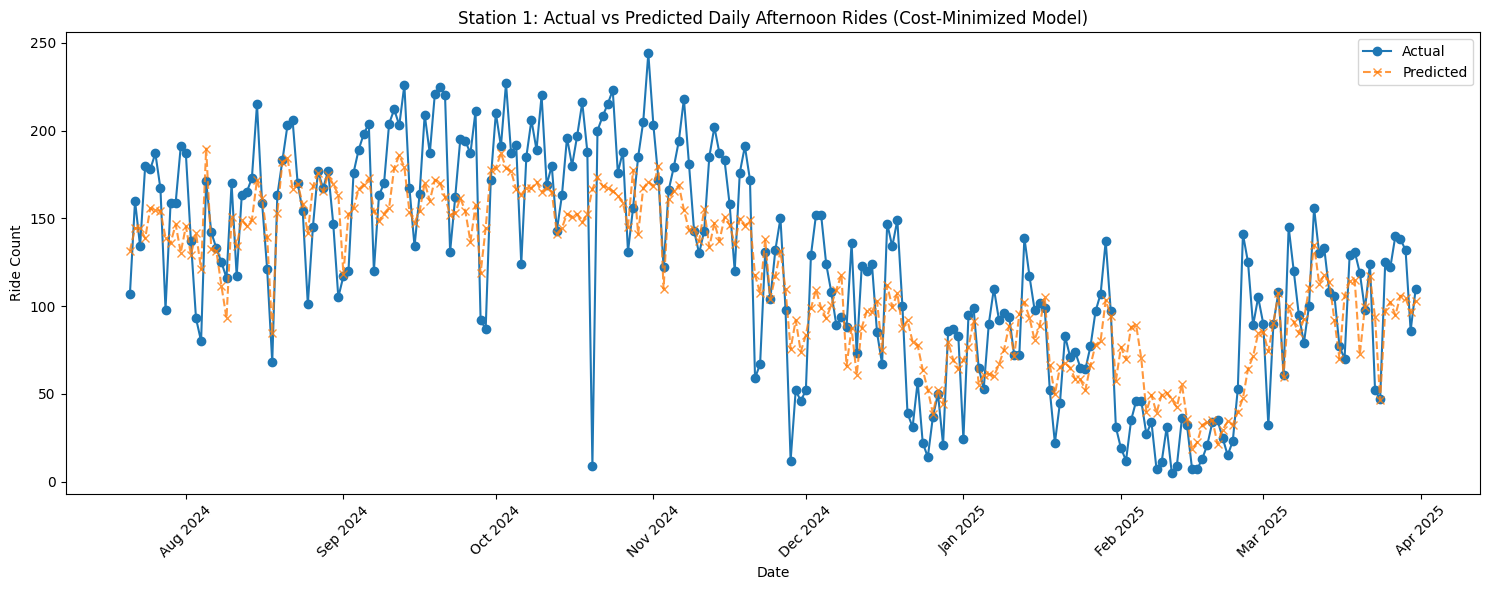

In [38]:
# Plot actual vs. predicted for cost model
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(test_dates, y_test.values, label='Actual', marker='o', linestyle='-')
ax.plot(test_dates, cost_y_pred,         label='Predicted', marker='x', linestyle='--', alpha=0.8)

# Formatting
ax.set_title('Station 1: Actual vs Predicted Daily Afternoon Rides (Cost-Minimized Model)')
ax.set_xlabel('Date')
ax.set_ylabel('Ride Count')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()